# QAP
http://anjos.mgi.polymtl.ca/qaplib/inst.html#Ta

In [29]:
from emplacement import Emplacement
from equipment import Equipment
from solution import Solution
from utils import extract, obj_simple, obj_simple_2, get_best_voisin_small, v_permute_one, recuit, tabou, brute_force, descente, get_best_voisin, nb_voisins
from time import perf_counter 
import matplotlib.pyplot as plt

In [38]:
plt.rcParams['figure.figsize'] = [25, 10]
path = "data/tai150b.dat"

In [39]:
emplacements, equipments = extract(path)
s = Solution(emplacements, equipments) # init random
print("Fitness initiale :", obj_simple(s))
print("Nombre de voisins :", nb_voisins(s))

Fitness initiale : 633329662
Nombre de voisins : 11175


In [23]:
max_time=10

In [16]:
def print_graph(nb_steps, value_at_steps, min_at_steps):
    gap = nb_steps/len(value_at_steps)
    axis = [i*gap for i in range(len(value_at_steps))]

    plt.plot(axis, value_at_steps, 'b')
    plt.plot(axis, min_at_steps, 'r')
    plt.ylabel('Fitness')
    plt.xlabel('Step')
    plt.show()

### Recuit simulé :

Temperature = 44088.21111817413
n1 = 28
nb_steps= 53158
Fitness recuit : 14057302


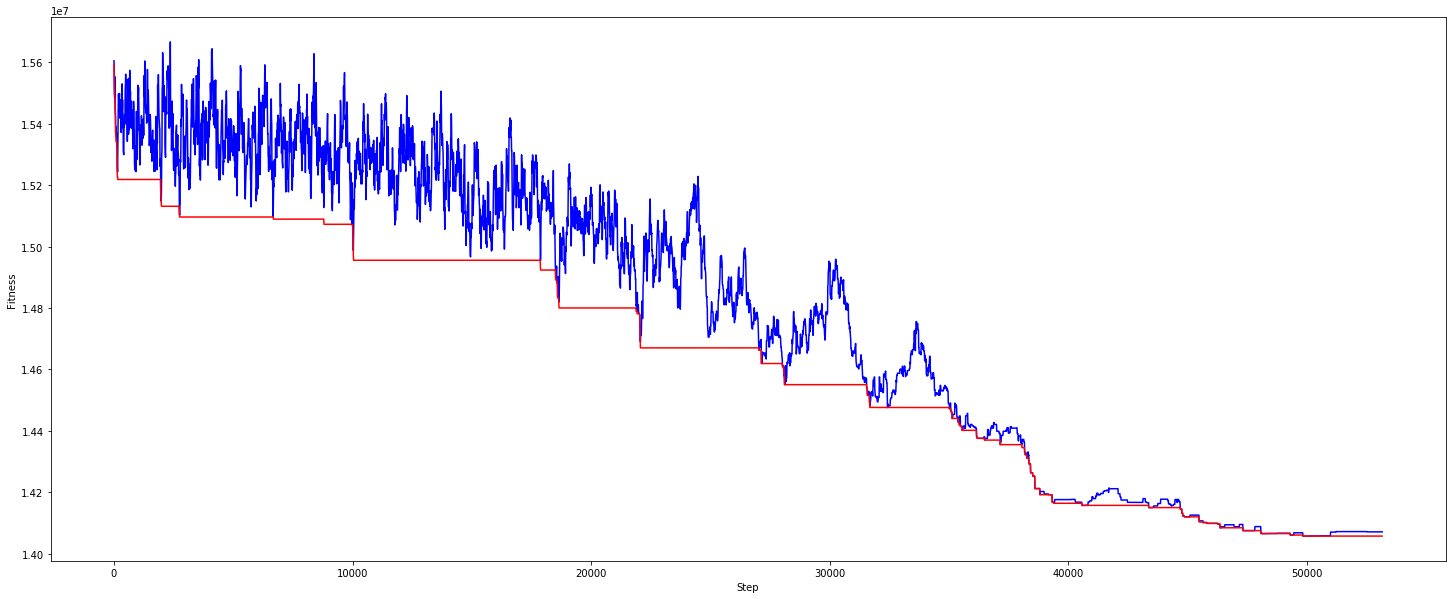

In [17]:
s_recuit, f_min, nb_steps, value_at_steps, min_at_steps = recuit(
    f_voisin=v_permute_one,
    f_obj=obj_simple_2, 
    s=s, 
    mu=0.9,
    max_time=max_time,
    return_stats=True)
print("Fitness recuit :", obj_simple_2(s_recuit))
print_graph(nb_steps, value_at_steps, min_at_steps)

### Méthode tabou :

In [25]:
s_tabou, f_min, nb_steps, value_at_steps, min_at_steps = tabou(f_voisin=get_best_voisin,
                f_obj=obj_simple_2,
                s=s,
                list_size=50,
                max_time=max_time,
                return_stats=True)
print("Fitness tabou :", obj_simple_2(s_tabou))
print_graph(nb_steps, value_at_steps, min_at_steps)

nb_steps= 2
Fitness tabou : 15413746


ZeroDivisionError: division by zero

### Descente

nb_step= 362
nb_restart= 190
Fitness descente: 15306736


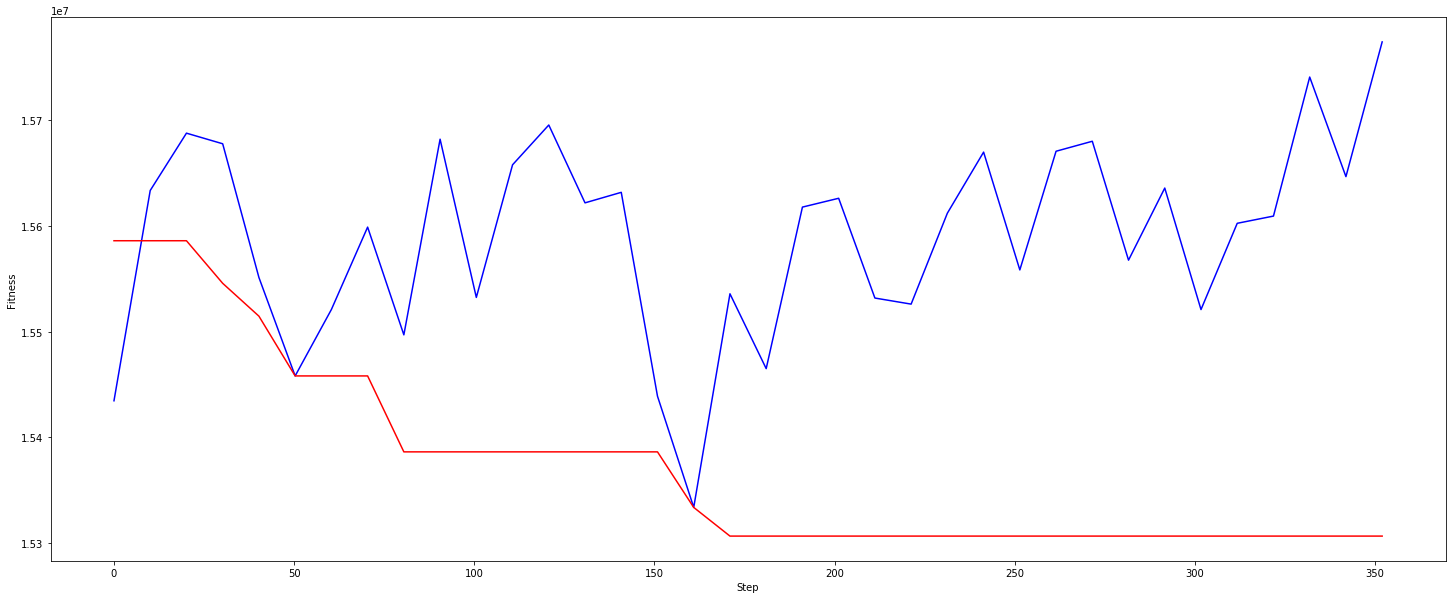

In [21]:
s_d, f_min, nb_steps, value_at_steps, min_at_steps = descente(get_best_voisin_small,
                                                              obj_simple_2,
                                                              s, 
                                                              max_time=max_time,
                                                              return_stats=True)
print("Fitness descente:", f_min)
print_graph(nb_steps, value_at_steps, min_at_steps)

### Brute Force

Fitness Brute Force: 15224370


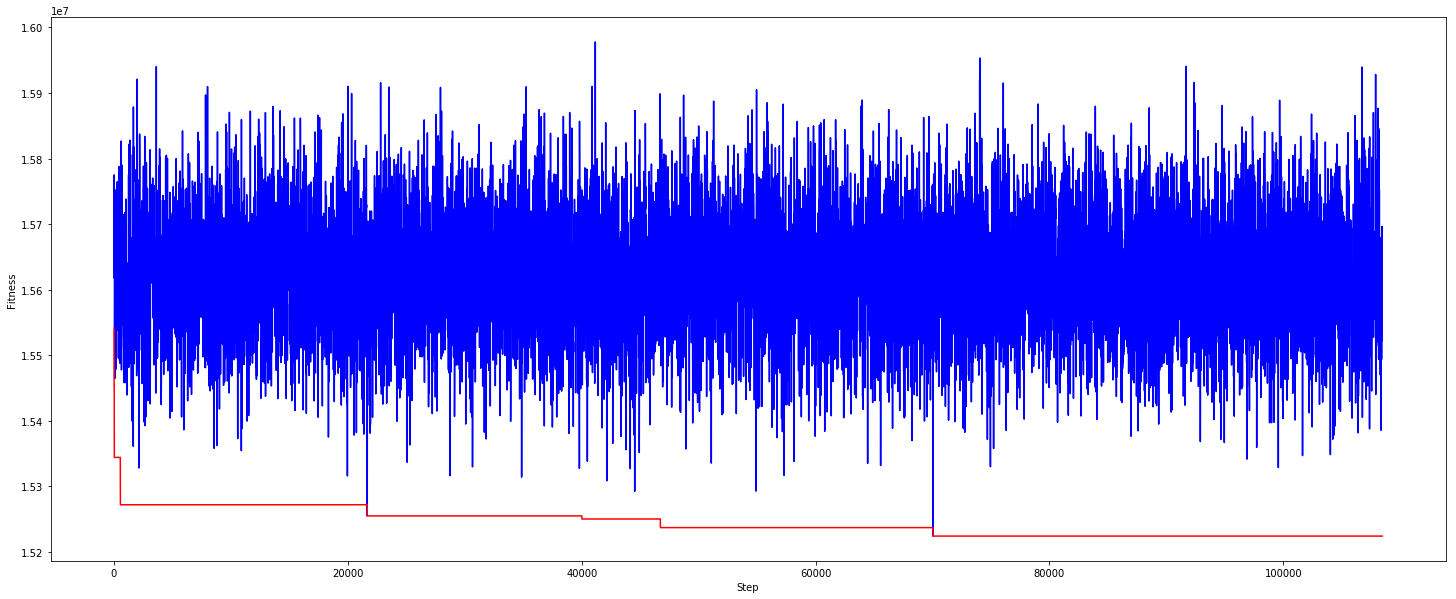

In [20]:
s_brute_force, f_min, nb_steps, value_at_steps, min_at_steps = brute_force(obj_simple_2, s, max_time, return_stats=True)
print("Fitness Brute Force:", f_min)
print_graph(nb_steps, value_at_steps, min_at_steps)

### Solution optimale

In [21]:
s_optimale = Solution(emplacements, equipments, [8,1,6,2,11,10,3,5,9,7,12,4])
print("Fitness opt :", obj_simple(s_optimale))

Fitness opt : 320362


# Tests

In [ ]:
start = perf_counter()
print(obj_simple(s))
end = perf_counter()
print((end - start))

start = perf_counter()
print(obj_simple_2(s))
end = perf_counter()
print((end - start))

In [ ]:
s2 = s
s = s.copy()

In [ ]:
hex(id(s2.emplacements))

In [ ]:
hex(id(s.emplacements))

In [ ]:
hex(id(s2.x))

In [ ]:
hex(id(s.x))

In [40]:
import json

In [85]:
filepath = 'configs/brute_force3.json'

with open(filepath, 'w') as f:
    f.write(json.dumps(d))

In [53]:
d = {
    'file': 'tai150a.dat',
    'algo': 'recuit',
    'mus': [0.9,0.99],
    'runtimes': [600, 1800]
}

In [66]:
d = {
    'file': 'tai150b.dat',
    'algo': 'tabou',
    'list_sizes': [100, 1000],
    'runtimes': [1800],
    'f_voisin_small': True
}

In [78]:
d = {
    'file': 'tai80a.dat',
    'algo': 'descente',
    'runtimes': [600, 1800],
    'f_voisin_small': True
}

In [84]:
d = {
    'file': 'tai150b.dat',
    'algo': 'brute_force',
    'runtimes': [1800]
}